In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_df = pd.read_csv("scrap price.csv")

In [3]:
car_df.shape

(205, 26)

In [4]:
car_df.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## 1. Checking for null values

In [6]:
car_df.isnull().sum()

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

> **There are no null / missing values in the dataset**

## 2. Checking for outliers - numerical features

In [7]:
car_df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

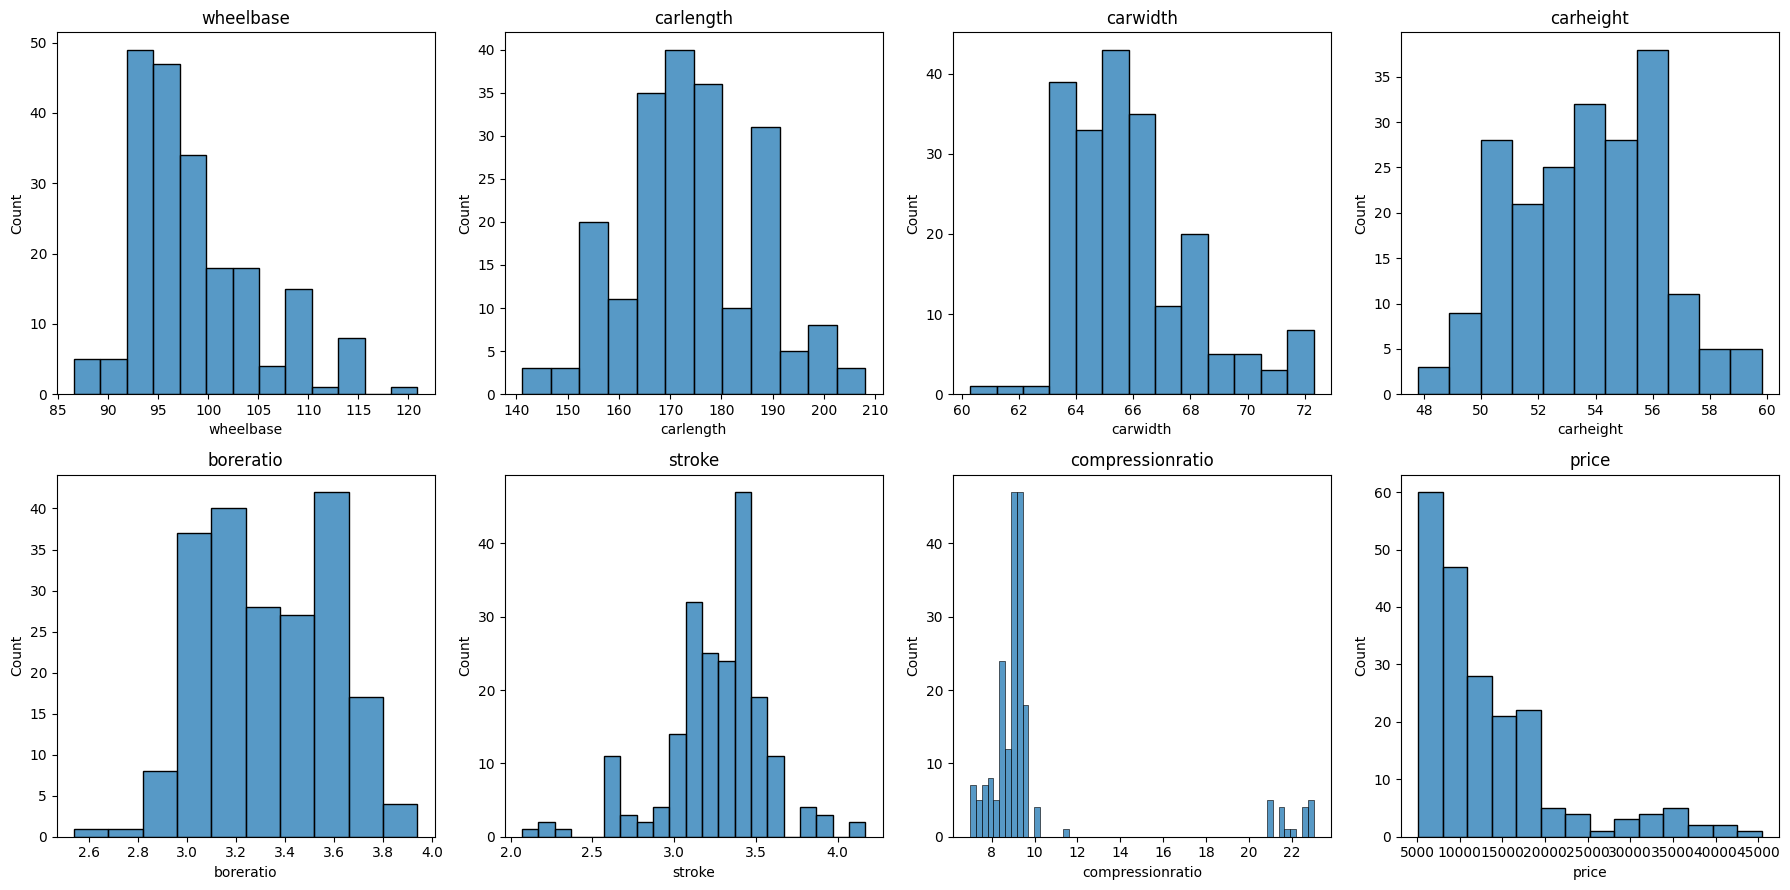

In [8]:
# Distplot

plt.figure(figsize=(18,9))
float_cols = car_df.select_dtypes(include = "float64").columns
n = np.arange(0,len(float_cols),1)
for i,k in zip(float_cols,n):
    plt.subplot(2,4,k+1)
    sns.histplot(car_df[i])
    plt.title(float_cols[k])
    plt.tight_layout()

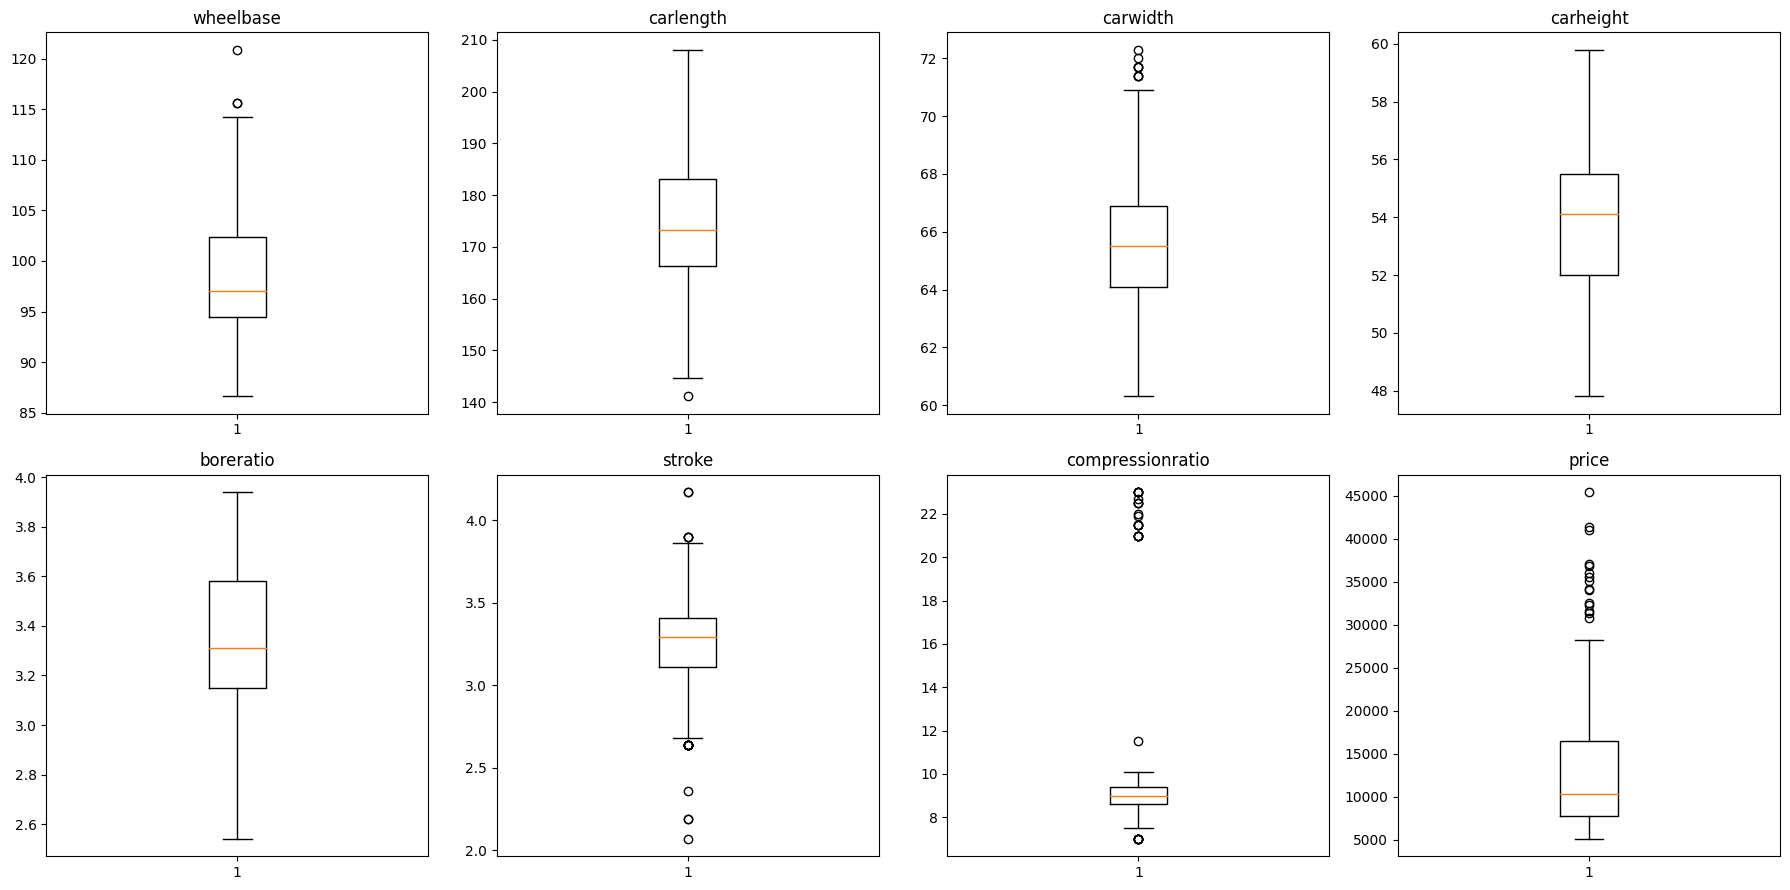

In [9]:
# Boxplot

plt.figure(figsize=(18,9))
float_cols = car_df.select_dtypes(include = "float64").columns
n = np.arange(0,len(float_cols),1)
for i,k in zip(float_cols,n):
    plt.subplot(2,4,k+1)
    plt.boxplot(car_df[i])
    plt.title(float_cols[k])
    plt.tight_layout()

### Inferences:

>**1. Compression ratio is extremely non-uniformly distributed <br>
>2. This could be due to different compression ratios between diesel and gasoline fuels <br>
>3. The variation in the stroke values is also due to the diesel and gasoline fuels <br>
>4. Majority of the car scrap value is less than 25,000**

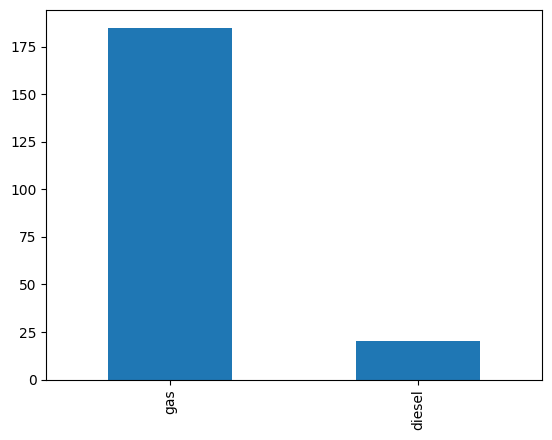

In [10]:
# count plot between gas and diesel fuel types

bar_plot = car_df['fueltypes'].value_counts().plot.bar()

> **Gas count = 180 <br>
> Diesel count = 20**

In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

print("MAX compression ratio of DIESEL:{}".format(car_df.loc[car_df.fueltypes == 'diesel',['fueltypes','compressionratio']]['compressionratio'].max()))
print("MIN compression ratio of DIESEL:{}".format(car_df.loc[car_df.fueltypes == 'diesel',['fueltypes','compressionratio']]['compressionratio'].min()))

print("MAX compression ratio of GAS: {}".format(car_df.loc[car_df.fueltypes == 'gas',['fueltypes','compressionratio']]['compressionratio'].max()))

MAX compression ratio of DIESEL:23.0
MIN compression ratio of DIESEL:21.0
MAX compression ratio of GAS: 11.5


>**This CONFIRMS that the compression ratio is non-uniformly distrubuted because <br> of different compression ratios between diesel and gasoline**

## 3. Checking for imbalanced data - categorical features

In [12]:
# object columns

obj_cols = car_df.select_dtypes("object").drop('name', axis = 1).columns
obj_cols

Index(['fueltypes', 'aspiration', 'doornumbers', 'carbody', 'drivewheels',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

<Figure size 2300x1800 with 0 Axes>

<Axes: >

<Axes: xlabel='fueltypes', ylabel='count'>

Text(0.5, 1.0, 'fueltypes')

<Axes: >

<Axes: xlabel='aspiration', ylabel='count'>

Text(0.5, 1.0, 'aspiration')

<Axes: >

<Axes: xlabel='doornumbers', ylabel='count'>

Text(0.5, 1.0, 'doornumbers')

<Axes: >

<Axes: xlabel='carbody', ylabel='count'>

Text(0.5, 1.0, 'carbody')

<Axes: >

<Axes: xlabel='drivewheels', ylabel='count'>

Text(0.5, 1.0, 'drivewheels')

<Axes: >

<Axes: xlabel='enginelocation', ylabel='count'>

Text(0.5, 1.0, 'enginelocation')

<Axes: >

<Axes: xlabel='enginetype', ylabel='count'>

Text(0.5, 1.0, 'enginetype')

<Axes: >

<Axes: xlabel='cylindernumber', ylabel='count'>

Text(0.5, 1.0, 'cylindernumber')

<Axes: >

<Axes: xlabel='fuelsystem', ylabel='count'>

Text(0.5, 1.0, 'fuelsystem')

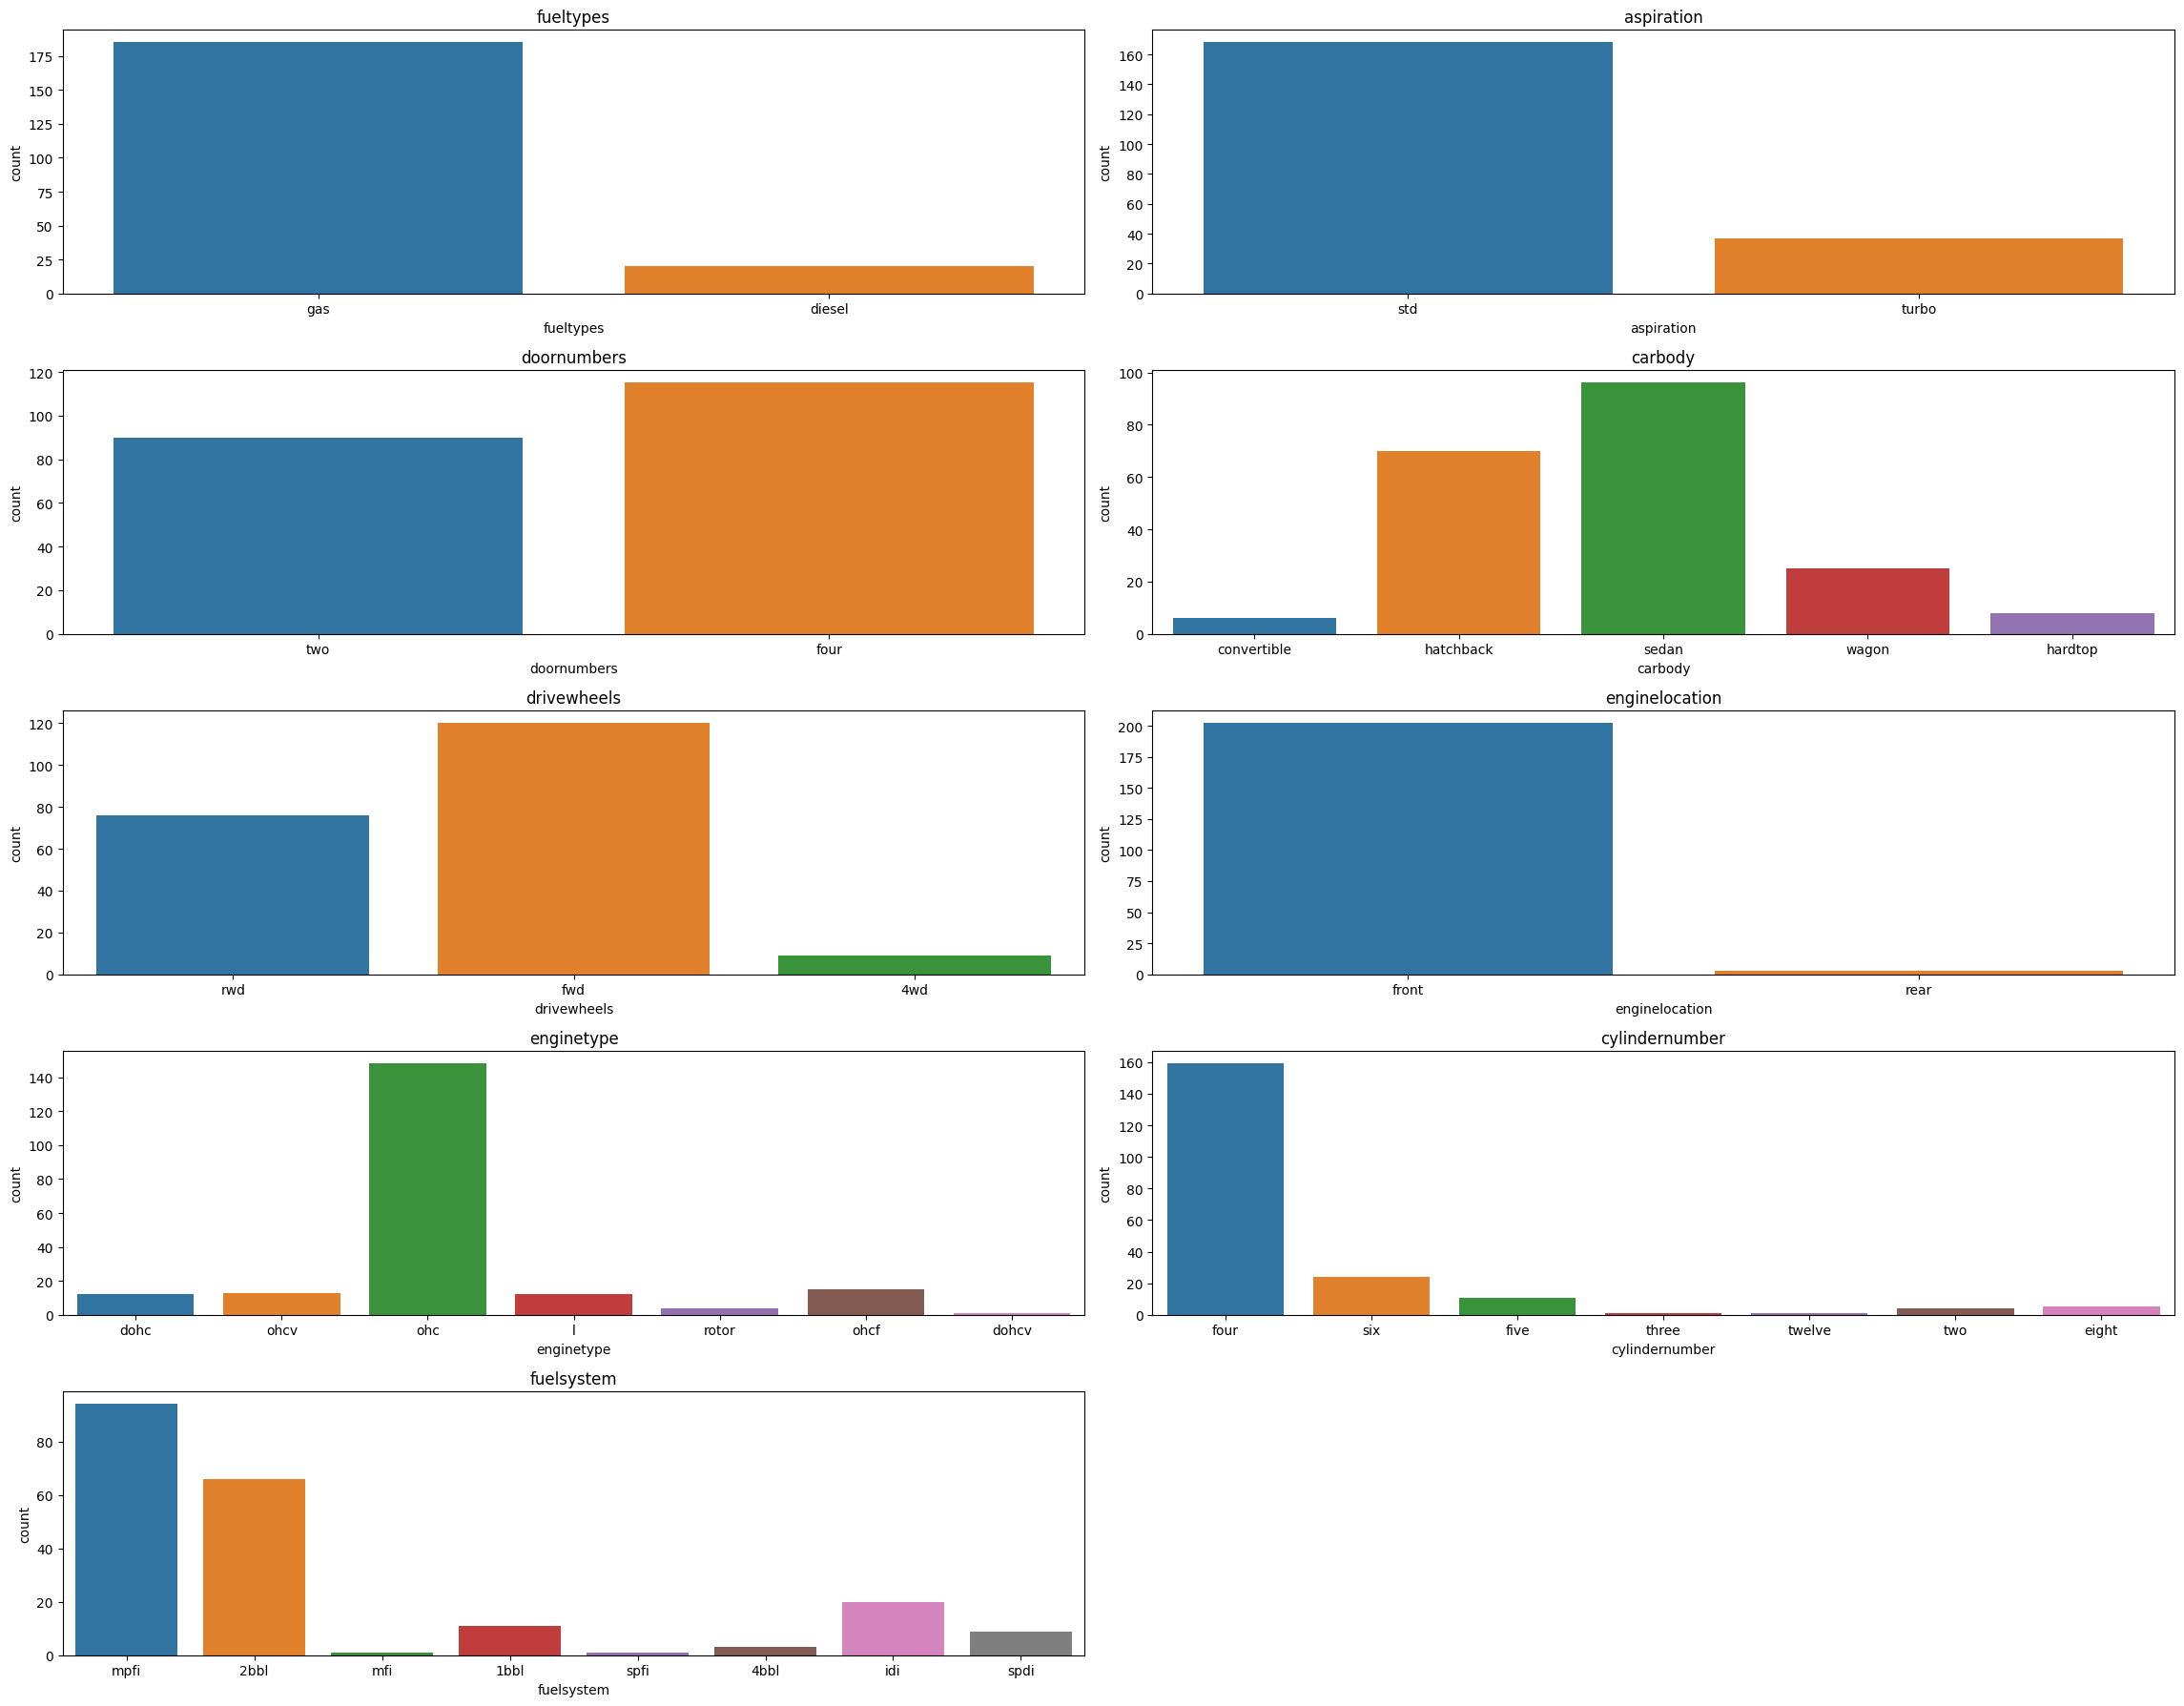

In [13]:
# Count plots of various Object columns in the data

plt.figure(figsize=(23,18))
n = np.arange(0,len(obj_cols),1)
for i,k in zip(obj_cols,n):
    plt.subplot(5,2,k+1)
    sns.countplot(x = car_df[i])
    plt.title(obj_cols[k])
    plt.tight_layout()

In [14]:
# Sorting out the imbalance in the data

car_df["carbody"] = car_df["carbody"].apply(lambda x : 'sedan' if x == 'sedan' else ('hatchback' if x == 'hatchback' else 'others'))
car_df["drivewheels"] = car_df["drivewheels"].apply(lambda x : 'forward_drive' if x == 'fwd' else ('rear_drive' if x == 'rwd' else 'fourwheel_drive'))
car_df["enginetype"] = car_df["enginetype"].apply(lambda x : 'ohc' if x == 'ohc' else 'others')
car_df["cylindernumber"] = car_df["cylindernumber"].apply(lambda x : 'four' if x == 'four' else ('six' if x == 'six' else 'others'))
car_df["fuelsystem"] = car_df["fuelsystem"].apply(lambda x : 'mpfi' if x == 'mpfi' else ('2bbl' if x == '2bbl' else 'others'))

<Figure size 2300x1800 with 0 Axes>

<Axes: >

<Axes: xlabel='fueltypes', ylabel='count'>

Text(0.5, 1.0, 'fueltypes')

<Axes: >

<Axes: xlabel='aspiration', ylabel='count'>

Text(0.5, 1.0, 'aspiration')

<Axes: >

<Axes: xlabel='doornumbers', ylabel='count'>

Text(0.5, 1.0, 'doornumbers')

<Axes: >

<Axes: xlabel='carbody', ylabel='count'>

Text(0.5, 1.0, 'carbody')

<Axes: >

<Axes: xlabel='drivewheels', ylabel='count'>

Text(0.5, 1.0, 'drivewheels')

<Axes: >

<Axes: xlabel='enginelocation', ylabel='count'>

Text(0.5, 1.0, 'enginelocation')

<Axes: >

<Axes: xlabel='enginetype', ylabel='count'>

Text(0.5, 1.0, 'enginetype')

<Axes: >

<Axes: xlabel='cylindernumber', ylabel='count'>

Text(0.5, 1.0, 'cylindernumber')

<Axes: >

<Axes: xlabel='fuelsystem', ylabel='count'>

Text(0.5, 1.0, 'fuelsystem')

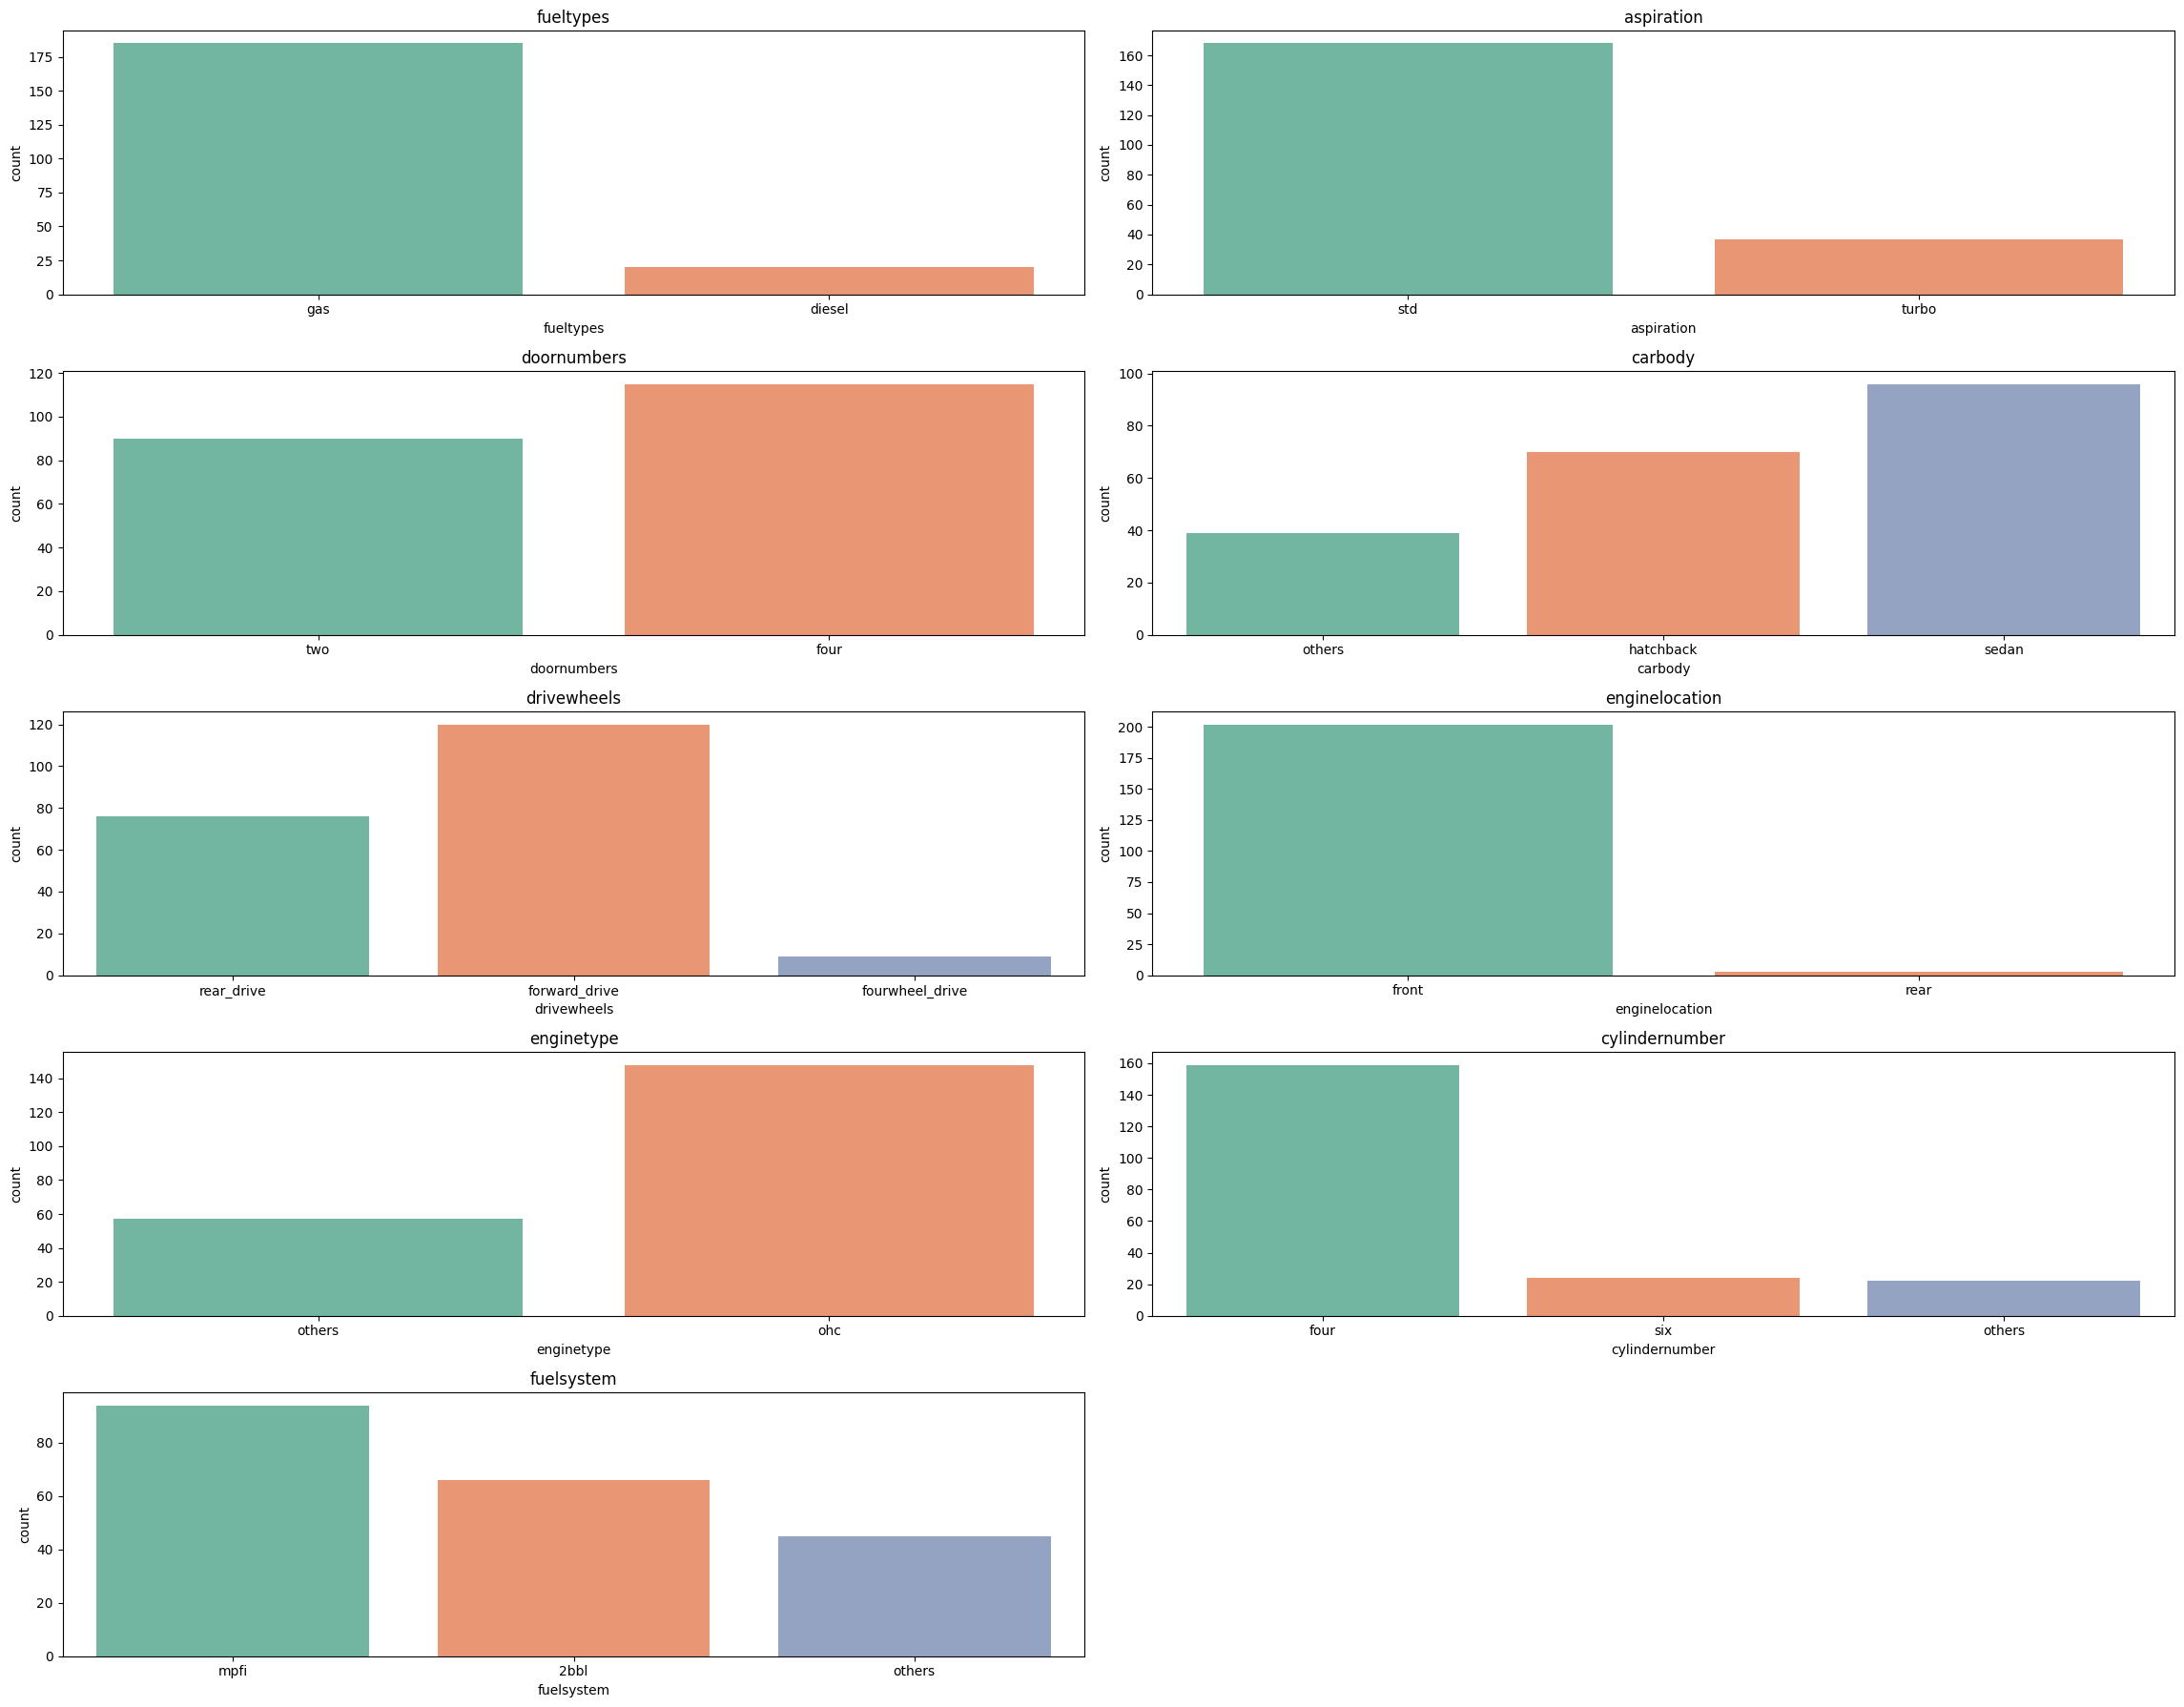

In [15]:
# After sorting categorical features

plt.figure(figsize=(23,18))
n = np.arange(0,len(obj_cols),1)
for i,k in zip(obj_cols,n):
    plt.subplot(5,2,k+1)
    sns.countplot(x = car_df[i], palette = 'Set2')
    plt.title(obj_cols[k])
    plt.tight_layout()

> **The categorical features looks much cleaner now and easier for training**

## 4. Exploratory Data Analysis

In [16]:
# pairplots between numerical features

pairplot_df = car_df.select_dtypes("number" ).drop(columns=['ID','symboling'])

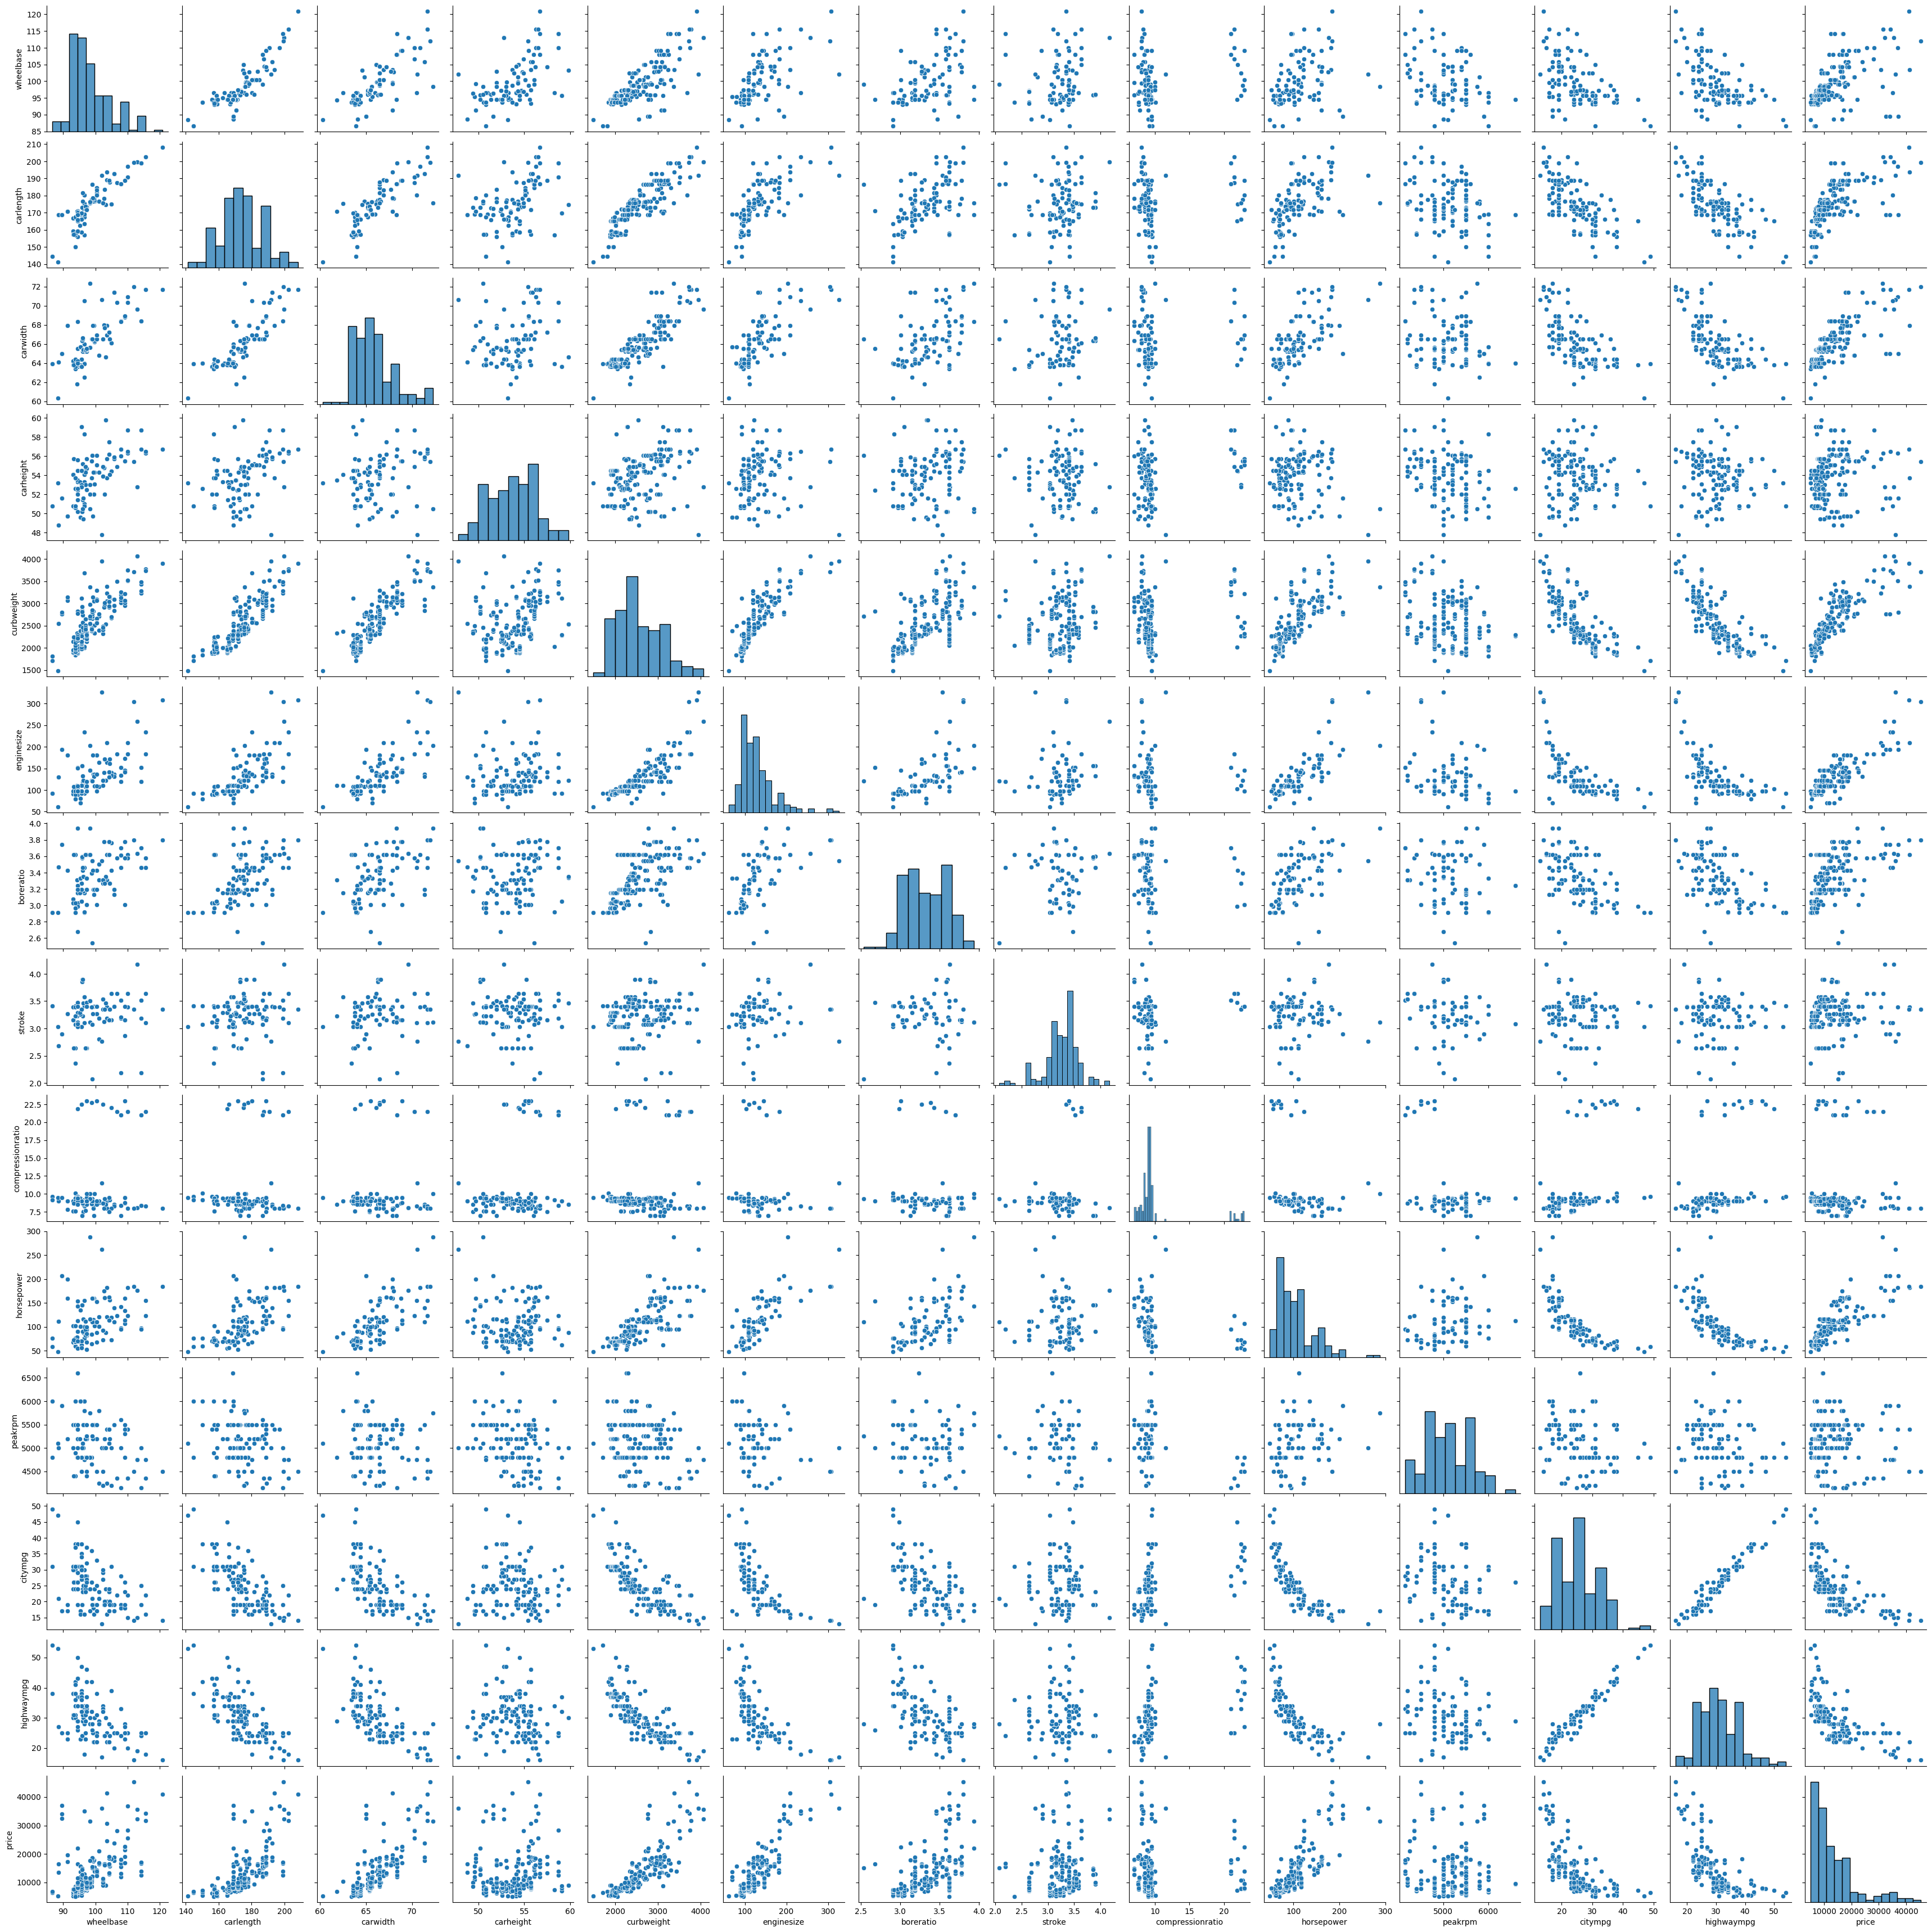

In [17]:
sns.pairplot(pairplot_df)

<Figure size 1000x700 with 0 Axes>

<Axes: >

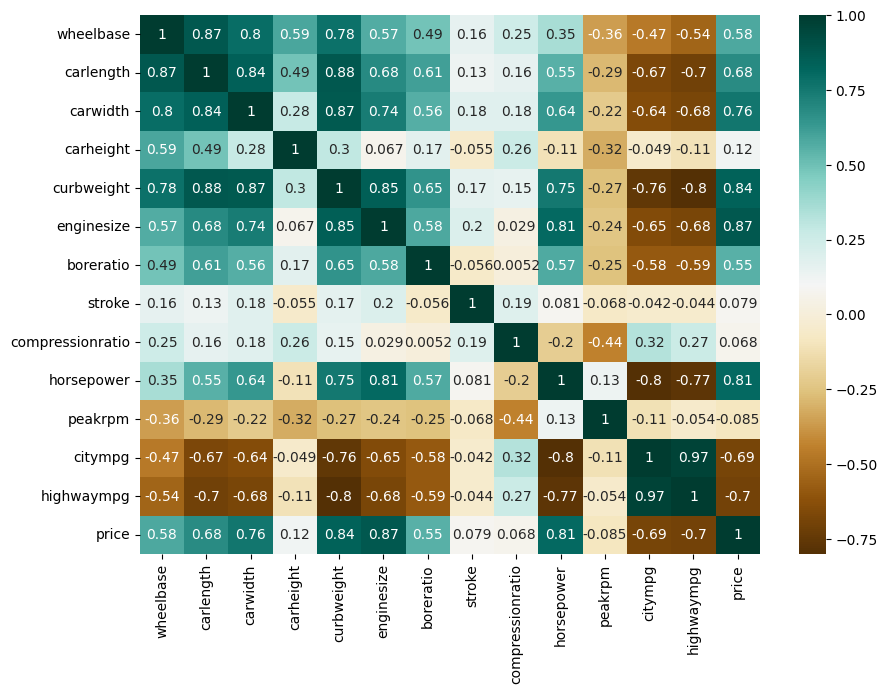

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(pairplot_df.corr(),annot_kws={"size": 10} ,annot=True,cmap='BrBG')

### Major inferences from pairplots and correlation heatmap
<ul>
<li>Strong positive correlation between wheelbase - carlength - carwidth - curbweight</li>
<li>Price has strong positive correlations between carwidth - curbweight - enginesize - horsepower </li>
<li>While it has a strong negative correlation between citympg - highwaympg</li>
<li>High horse power requires large engine size and curb weight</li>
<li>Horse power has negative impact on 'mpg'</li>
</ul>

In [19]:
# grouping of carbody and doornumbers

grp = car_df.groupby(['carbody','doornumbers'])
grp_dict = grp.agg({'curbweight':'mean','wheelbase':'mean','carheight':'mean','carwidth':'mean', 'carlength':'mean', 'enginesize':'mean'})
grp_dict

curbweight   wheelbase  carheight   carwidth  \
carbody   doornumbers                                                  
hatchback four         2207.600000   97.100000  53.210000  64.910000   
          two          2371.616667   95.275000  51.925000  65.303333   
others    four         2784.240000  102.156000  56.728000  66.256000   
          two          2806.785714   96.014286  52.242857  66.171429   
sedan     four         2657.975000  101.318750  54.562500  66.487500   
          two          2373.687500   97.125000  53.212500  65.125000   

                        carlength  enginesize  
carbody   doornumbers                          
hatchback four         167.460000  106.400000  
          two          166.448333  115.733333  
others    four         181.304000  123.840000  
          two          174.128571  168.071429  
sedan     four         178.843750  131.525000  
          two          171.293750  127.312500

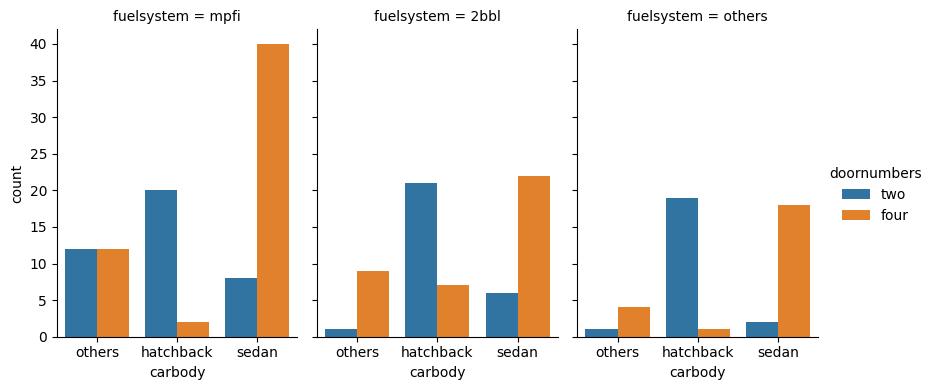

In [20]:
# Common fuel injection system used based on car body and number of doors

sns.catplot(x="carbody", hue="doornumbers", col="fuelsystem", data= car_df, kind="count",height=4, aspect=.7)

### Inferences

> 1. Two door cars are dominated by hatch back body <br>
> 2. Four door cars are dominate by sedan type body <br>
> 3. Hatch back cars are uniformly distributed irrespective of the fuel system <br>
> 4. Sedan cars prefer multi-point fuel injection system <br>

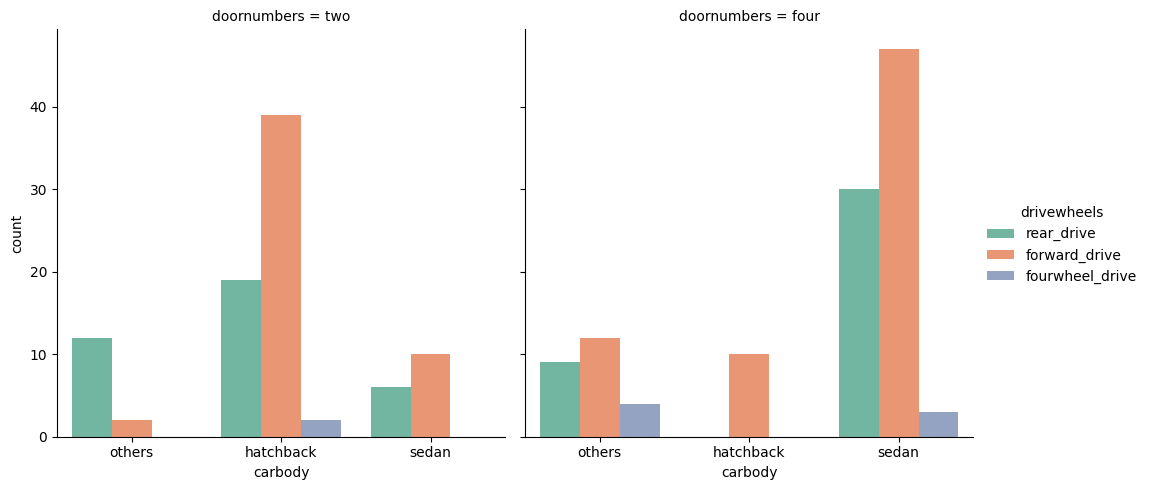

In [21]:
# Various drivewheels adopted by different carbody and doornumbers

sns.catplot(x="carbody", hue="drivewheels", col="doornumbers", data= car_df, kind="count",aspect=1, palette="Set2")

### Inferences

> 1. Rear wheel drive are preferred for sedan with four doors and hatch back with two wheel drive
> 2. Forward wheel drive is much preferred irrespective of the door numbers or car body type

<Axes: xlabel='curbweight', ylabel='Count'>

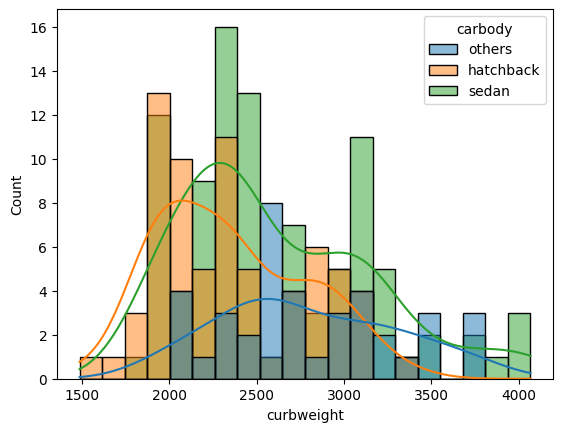

In [22]:
# Curbweight vs carbody

sns.histplot(data = car_df, x ='curbweight', hue ='carbody', kde = True, bins = 20)

### Inferences

> 1. The curb weight is highly rightly skewed for hatch back and sedan models, which shows it is more likely to lie between 2000-2500 kg
> 2. While other car body types have normally distributed curb weight with high variance

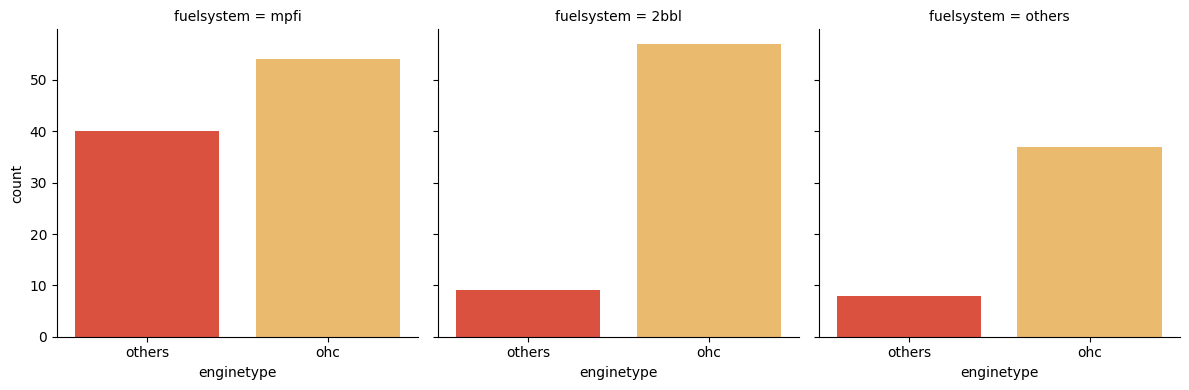

In [23]:
sns.catplot(x="enginetype", col="fuelsystem",data= car_df, kind="count",height=4, aspect=1, palette="YlOrRd_r")

### Inferences

> 1. Multi point fuel injection is the most commonly used fuel system across various engine types 
> 2. This is followed by 2 bbl fuel injection system

In [24]:
# object columns

car_df.select_dtypes('object').columns

Index(['name', 'fueltypes', 'aspiration', 'doornumbers', 'carbody',
       'drivewheels', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

### Scrap value range of Diesel and Gasoline cars

The minimum scrap value of a diesel car is 7099.0
The maximum scrap value of a diesel car is 31600.0


<Axes: xlabel='price', ylabel='Count'>

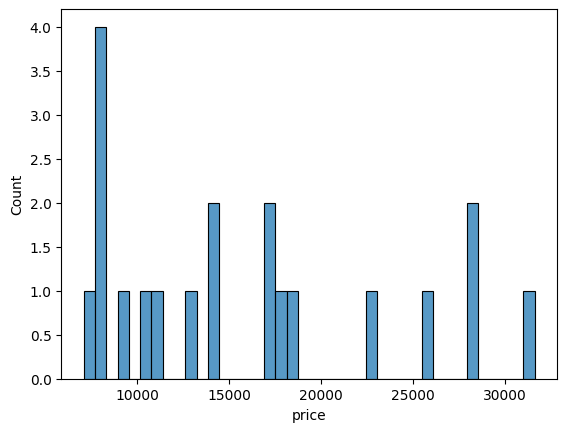

In [25]:
# Price Distributon of Diesel Cars

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

grp_fuel = car_df.loc[car_df.fueltypes == 'diesel', ['price','fueltypes']].reset_index()
print(f'The minimum scrap value of a diesel car is {grp_fuel["price"].min()}')
print(f'The maximum scrap value of a diesel car is {grp_fuel["price"].max()}')
sns.histplot(x=grp_fuel.price, bins = 40)

The minimum scrap value of a gasoline car is 5118.0
The maximum scrap value of a gasoline car is 45400.0


<Axes: xlabel='price', ylabel='Count'>

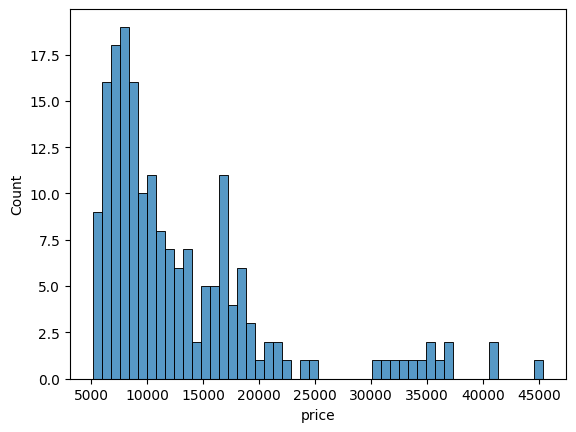

In [26]:
# Price Distributon of Gasoline Cars

grp_fuel = car_df.loc[car_df.fueltypes == 'gas', ['price','fueltypes']].reset_index()
print(f'The minimum scrap value of a gasoline car is {grp_fuel["price"].min()}')
print(f'The maximum scrap value of a gasoline car is {grp_fuel["price"].max()}')
sns.histplot(x=grp_fuel.price, bins = 50)

### Inferences

> 1. Diesel car scrap price range : 7099 - 31600
> 2. Gasoline car scrap price range : 5118 - 45400

### Horsepower range of Diesel and Gasoline cars

The minimum HORSEPOWER of a gasoline car is 48
The maximum HORSEPOWER of a gasoline car is 288


<Axes: xlabel='horsepower', ylabel='Count'>

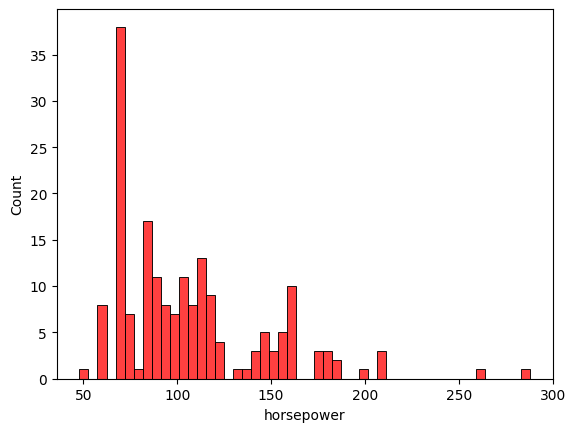

In [27]:
# Gasoline - Horsepower

grp_fuel = car_df.loc[car_df.fueltypes == 'gas', ['horsepower','fueltypes']].reset_index()
print(f'The minimum HORSEPOWER of a gasoline car is {grp_fuel["horsepower"].min()}')
print(f'The maximum HORSEPOWER of a gasoline car is {grp_fuel["horsepower"].max()}')
sns.histplot(x=grp_fuel.horsepower, bins = 50, color = 'red')

The minimum HORSEPOWER of a diesel car is 52
The maximum HORSEPOWER of a diesel car is 123


<Axes: xlabel='horsepower', ylabel='Count'>

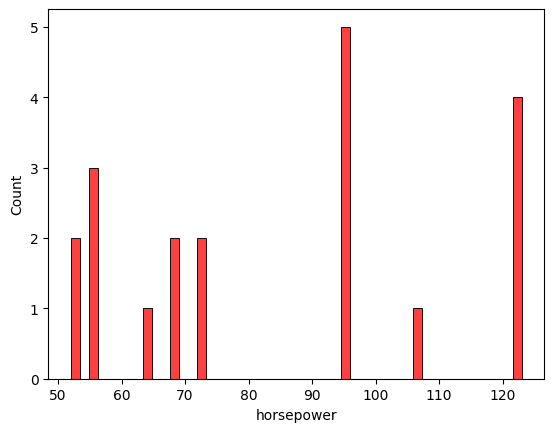

In [28]:
# Diesel - Horsepower

grp_fuel = car_df.loc[car_df.fueltypes == 'diesel', ['horsepower','fueltypes']].reset_index()
print(f'The minimum HORSEPOWER of a diesel car is {grp_fuel["horsepower"].min()}')
print(f'The maximum HORSEPOWER of a diesel car is {grp_fuel["horsepower"].max()}')
sns.histplot(x=grp_fuel.horsepower, bins = 50, color = 'red', legend = True)

### Inferences

> 1. Gasoline has a maximum horse power twice that of the maximum horse power of diesel
> 2. Since, the Diesel category is under-sampled, it is sparsely distributed

### MPG range of Diesel and Gasoline cars

The minimum citympg of a gasoline car is 13
The maximum citympg of a gasoline car is 49
The median citympg of a gasoline car is 24.0


The minimum highwaympg of a gasoline car is 16
The maximum highwaympg of a gasoline car is 54
The median highwaympg of a gasoline car is 30.0


<Axes: xlabel='citympg', ylabel='Count'>

<Axes: xlabel='citympg', ylabel='Count'>

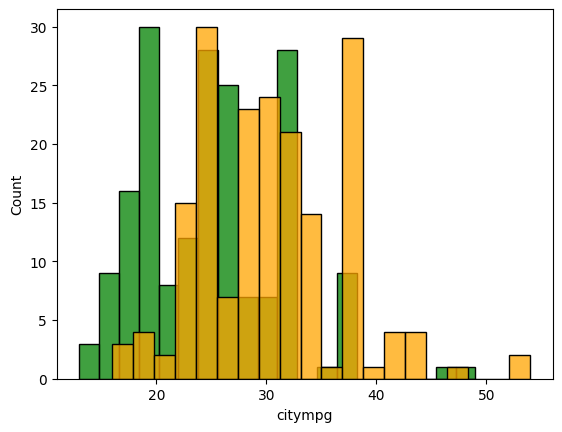

In [29]:
# Gasoline - Citympg - Highway

grp_fuel = car_df.loc[car_df.fueltypes == 'gas', ['citympg','fueltypes']].reset_index()
print(f'The minimum citympg of a gasoline car is {grp_fuel["citympg"].min()}')
print(f'The maximum citympg of a gasoline car is {grp_fuel["citympg"].max()}')
print(f'The median citympg of a gasoline car is {grp_fuel["citympg"].median()}')
print('\n')

grp_fuel_high = car_df.loc[car_df.fueltypes == 'gas', ['highwaympg','fueltypes']].reset_index()
print(f'The minimum highwaympg of a gasoline car is {grp_fuel_high["highwaympg"].min()}')
print(f'The maximum highwaympg of a gasoline car is {grp_fuel_high["highwaympg"].max()}')
print(f'The median highwaympg of a gasoline car is {grp_fuel_high["highwaympg"].median()}')

sns.histplot(x=grp_fuel.citympg, bins = 20, color = 'green')
sns.histplot(x=grp_fuel_high.highwaympg, bins = 20, color = 'orange')

The minimum citympg of a diesel car is 22
The maximum citympg of a diesel car is 45
The median citympg of a diesel car is 29.0


The minimum highwaympg of a diesel car is 25
The maximum highwaympg of a diesel car is 50
The median highwaympg of a diesel car is 33.0


<Axes: xlabel='citympg', ylabel='Count'>

<Axes: xlabel='citympg', ylabel='Count'>

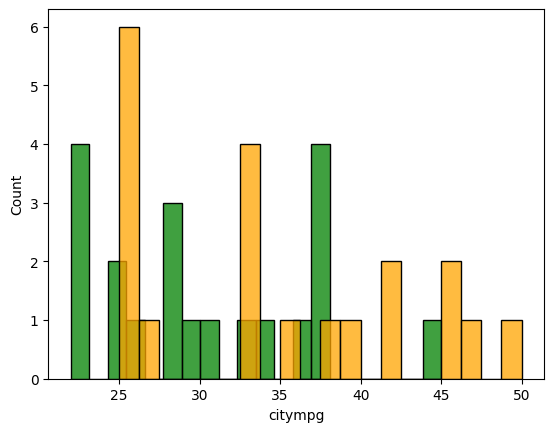

In [30]:
# Diesel - Citympg - Highway

grp_fuel = car_df.loc[car_df.fueltypes == 'diesel', ['citympg','fueltypes']].reset_index()
print(f'The minimum citympg of a diesel car is {grp_fuel["citympg"].min()}')
print(f'The maximum citympg of a diesel car is {grp_fuel["citympg"].max()}')
print(f'The median citympg of a diesel car is {grp_fuel["citympg"].median()}')
print('\n')

grp_fuel_high = car_df.loc[car_df.fueltypes == 'diesel', ['highwaympg','fueltypes']].reset_index()
print(f'The minimum highwaympg of a diesel car is {grp_fuel_high["highwaympg"].min()}')
print(f'The maximum highwaympg of a diesel car is {grp_fuel_high["highwaympg"].max()}')
print(f'The median highwaympg of a diesel car is {grp_fuel_high["highwaympg"].median()}')

sns.histplot(x=grp_fuel.citympg, bins = 20, color = 'green')
sns.histplot(x=grp_fuel_high.highwaympg, bins = 20, color = 'orange')

### Inferences

> 1. The minimum mpg is much higher for diesel than for gasoline within the city limits
> 2. The median values of mpg are higher for diesel vehicles for both city and highway

In [31]:
city_diesel = car_df.loc[car_df.fueltypes == 'diesel', ['citympg','fueltypes', 'price']].reset_index()
city_diesel_40 = city_diesel.loc[city_diesel.citympg > 40, ['price','citympg']].reset_index().rename(columns = {'price':'diesel-car price'}).sort_values(by=['citympg'], ascending=True)
city_diesel_40

,index,diesel-car price,citympg
0,6,7099.0,45


In [32]:
highway_diesel = car_df.loc[car_df.fueltypes == 'diesel', ['highwaympg','fueltypes', 'price']].reset_index()
highway_diesel_40 = highway_diesel.loc[highway_diesel.highwaympg > 40, ['price','highwaympg']].reset_index().rename(columns = {'price':'diesel-car price'}).sort_values(by=['highwaympg'], ascending=True)
highway_diesel_40

,index,diesel-car price,highwaympg
0,0,10795.0,42
5,17,9495.0,42
3,15,7775.0,46
4,16,7995.0,46
2,13,7788.0,47
1,6,7099.0,50


In [33]:
city_gas = car_df.loc[car_df.fueltypes == 'gas', ['citympg','fueltypes', 'price']].reset_index()
city_gas_40 = city_gas.loc[city_gas.citympg > 40, ['price','citympg']].reset_index().rename(columns = {'price':'gasoline-car price'}).sort_values(by=['citympg'], ascending=True)
city_gas_40

,index,gasoline-car price,citympg
0,18,5151.0,47
1,30,6479.0,49


In [34]:
highway_gas = car_df.loc[car_df.fueltypes == 'gas', ['highwaympg','fueltypes', 'price']].reset_index()
highway_gas_40 = highway_gas.loc[highway_gas.highwaympg > 40, ['price','highwaympg']].reset_index().rename(columns = {'price':'gasoline-car price'}).sort_values(by=['highwaympg'], ascending=True)
highway_gas_40

,index,gasoline-car price,highwaympg
3,21,5572.0,41
8,70,5389.0,41
9,106,5572.0,41
5,32,5399.0,42
1,19,6295.0,43
2,20,6575.0,43
6,44,8916.5,43
7,45,8916.5,43
10,146,7738.0,47
0,18,5151.0,53


### Car price variation between Diesel cars and Gas cars with mileage >40

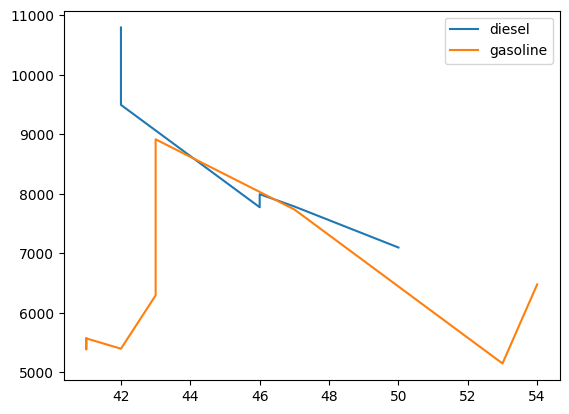

In [35]:
plt.plot(highway_diesel_40['highwaympg'], highway_diesel_40['diesel-car price'], label = 'diesel')
plt.plot(highway_gas_40['highwaympg'], highway_gas_40['gasoline-car price'], label = 'gasoline')
plt.legend()

### Inference

> 1. There is a steep decrease in the car prices with increase in highway mileage <br>
> 2. Gasonline cars dominate in providing mileage > 40 

## 5. Feature Selection and Engineering

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

num_df = car_df.select_dtypes('number')
X = num_df.iloc[:,:-1].drop(columns=['ID','symboling'])
y = num_df['price'].astype('int64')
y.head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

### (a) Top 10 important features using Chi-squared

In [37]:
chi_feat = SelectKBest(score_func = chi2)
kbest = chi_feat.fit_transform(X,y)

In [38]:
chi_score = pd.DataFrame(list(zip(X.columns,chi_feat.scores_)), columns = ['feature','score'])
chi_features_10 = chi_score.sort_values(by = 'score', ascending = False).nlargest(10,'score')

### (b) Checking the variance of the numerical columns

In [39]:
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold(threshold=0.6)
var.fit(num_df)
var.get_support()

VarianceThreshold(threshold=0.6)

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True])

In [40]:
var_df = pd.DataFrame(num_df.columns,var.get_support(), columns=['Features'])
var_df                     

,Features
True,ID
True,symboling
True,wheelbase
True,carlength
True,carwidth
True,carheight
True,curbweight
True,enginesize
False,boreratio
False,stroke


> **Variance less than 60% in boreratio and stroke**

In [41]:
chi_features_10

,feature,score
4,curbweight,21591.585590
10,peakrpm,8913.323895
9,horsepower,3048.935017
5,enginesize,2781.728802
11,citympg,343.409574
12,highwaympg,311.282360
8,compressionratio,299.147970
1,carlength,177.514836
0,wheelbase,74.289918
3,carheight,21.972560


In [42]:
car_df.shape

(205, 26)

### (c) Dropping the non-essential columns

In [43]:
drop_features = ['ID','symboling','name','aspiration','enginelocation','carwidth','enginetype','cylindernumber','boreratio','stroke']

In [44]:
car_df = car_df.drop(columns=drop_features)

In [45]:
car_df.shape

(205, 16)

### (d) Train - Test split

In [46]:
X = car_df.iloc[:,:-1]
y = car_df.iloc[:,-1]

X.shape
y.shape

(205, 15)

(205,)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### (e) Train columns Pre-Processing

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler,normalize

In [49]:
X_train.head()

,fueltypes,doornumbers,carbody,drivewheels,wheelbase,carlength,carheight,curbweight,enginesize,fuelsystem,compressionratio,horsepower,peakrpm,citympg,highwaympg
125,gas,two,hatchback,rear_drive,94.5,168.9,50.2,2778,151,mpfi,9.5,143,5500,19,27
42,gas,two,sedan,forward_drive,96.5,169.1,51.0,2293,110,2bbl,9.1,100,5500,25,31
156,gas,four,sedan,forward_drive,95.7,166.3,53.0,2081,98,2bbl,9.0,70,4800,30,37
136,gas,two,hatchback,forward_drive,99.1,186.6,56.1,2808,121,mpfi,9.0,160,5500,19,26
140,gas,two,hatchback,fourwheel_drive,93.3,157.3,55.7,2240,108,2bbl,8.7,73,4400,26,31


In [50]:
y_train.head()

125    22018.0
42     10345.0
156     6938.0
136    18150.0
140     7603.0
Name: price, dtype: float64

In [51]:
discrete_x = X_train.select_dtypes(include = ['number']).columns
categorical_x = X_train.select_dtypes(include = ['object']).columns

numeric_features = Pipeline(steps=[('scaling', StandardScaler(with_mean=True))])
categorical_features = Pipeline(steps=[('encoding',OneHotEncoder(drop='first'))])

processing = ColumnTransformer([('numeric',numeric_features,discrete_x),('cat',categorical_features,categorical_x)])
col_trans = processing.fit_transform(X_train)
X_input = normalize(col_trans)

In [52]:
import pickle
pickle.dump(processing,open('preprocess.pkl','wb'))

### (f) Test columns Pre-Processing

In [53]:
col_trans_test = processing.transform(X_test)
X_test_input = normalize(col_trans_test)

## 6. Model Selection

#####  [Function for scores and plots]

In [54]:
def scores_and_plots(X_shape, reg, y_predict, y_test):
    p = X_shape[1]
    n = X_shape[0]
    all_scores = {}
    
    all_scores[reg+'r2_score'] = r2_score(y_test , y_predict)
    all_scores[reg+'adj_R2'] = 1-(1-all_scores[reg+'r2_score'])*(n-1)/(n-p-1)
    all_scores[reg+'mse'] = mean_squared_error(y_test , y_predict)
    all_scores[reg+'mae'] = mean_absolute_error(y_test , y_predict)
    all_scores[reg+'mpae']= mean_absolute_percentage_error(y_test,y_predict)
    all_scores[reg+'reg_rmse']= np.sqrt(all_scores[reg+'mse'])
    
    print(f'The r2 score is :{all_scores[reg+"r2_score"]}')
    print(f'The adjusted r2 score is :{all_scores[reg+"adj_R2"]}')
    print(f'The mse score is :{all_scores[reg+"mse"]}')
    print(f'The mae score is :{all_scores[reg+"mae"]}')
    print(f'The mpae score is :{all_scores[reg+"mpae"]}')
    print(f'The rmse score is :{all_scores[reg+"reg_rmse"]}')
    

    sns.lineplot(x=range(len(y_predict)),y = y_predict)
    sns.lineplot(x=range(len(y_test)),y = y_test)

### (1) Linear Regressor

LinearRegression()

The r2 score is :0.7190251109821815
The adjusted r2 score is :0.6967255166156879
The mse score is :18385654.607952636
The mae score is :3239.9343419231573
The mpae score is :0.2722834543693082
The rmse score is :4287.849648477968


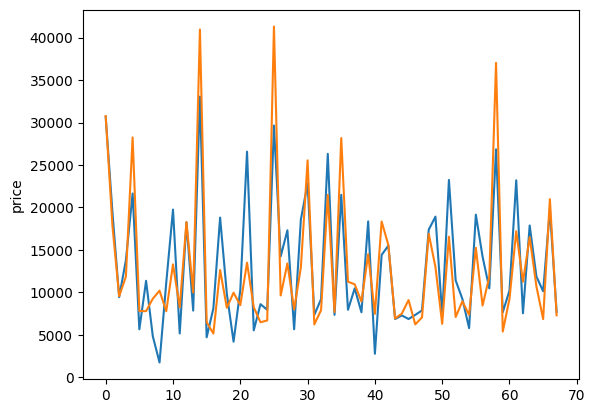

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_input, y_train)
y_predict = lin_model.predict(X_test_input)

scores_and_plots(X.shape,'linear',y_predict,y_test)

In [56]:
lin_model.coef_
lin_model.intercept_

array([ -1009.23979372,   6453.21925222,   1000.32185409,  -8540.1275406 ,
        24570.12914783,  -3638.63984001,    414.80532515,   3932.1529125 ,
        -9378.20018544,   -159.83223763, -21387.89756047,  -1944.1776087 ,
        -2846.52519169,    571.77305112,   3849.30462016,    989.57706933,
        -5261.65565979,  -8819.92616517])

22026.22750574525

### (2) Random Forest Regressor

RandomForestRegressor()

The r2 score is :0.9052999457568915
The adjusted r2 score is :0.8977840684360099
The mse score is :6196719.197058766
The mae score is :1792.8559203431375
The mpae score is :0.1424112060969003
The rmse score is :2489.321031337414


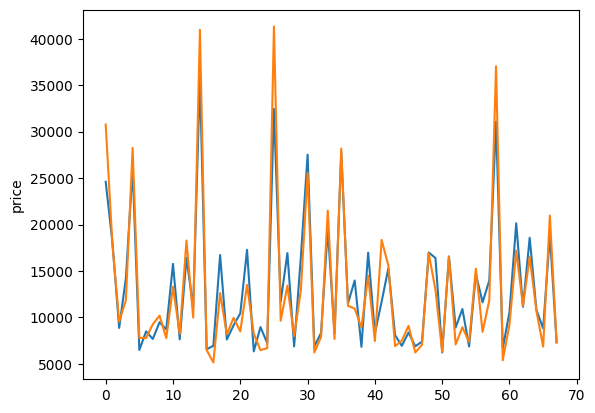

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_input, y_train)
y_pred_rfr = rf_reg.predict(X_test_input)

scores_and_plots(X.shape,'rfr',y_pred_rfr,y_test)

### (3) KNeighbours Regressor

In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

knr = KNeighborsRegressor()
params =  {'n_neighbors':[3,5,7,10],'weights':['uniform','distance'],'algorithm':['ball_tree','kd_tree']}

knr_rcv = RandomizedSearchCV(knr,params,random_state=32)

In [59]:
knr_rcv.fit(X_input,y_train)

RandomizedSearchCV(estimator=KNeighborsRegressor(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree'],
                                        'n_neighbors': [3, 5, 7, 10],
                                        'weights': ['uniform', 'distance']},
                   random_state=32)

In [60]:
pd.DataFrame(knr_rcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001600,7.997399e-04,0.002002,6.333161e-04,uniform,3,ball_tree,"{'weights': 'uniform', 'n_neighbors': 3, 'algo...",0.871796,0.664669,0.708017,0.733612,0.728172,0.741253,0.069628,7
1,0.001399,4.887531e-04,0.001401,4.898453e-04,uniform,7,kd_tree,"{'weights': 'uniform', 'n_neighbors': 7, 'algo...",0.850302,0.752766,0.837640,0.711006,0.673178,0.764978,0.069353,5
2,0.001600,4.900186e-04,0.001200,3.993994e-04,distance,3,kd_tree,"{'weights': 'distance', 'n_neighbors': 3, 'alg...",0.917890,0.681935,0.747099,0.776405,0.730144,0.770695,0.079723,3
3,0.001000,4.909339e-07,0.001401,4.905262e-04,uniform,10,kd_tree,"{'weights': 'uniform', 'n_neighbors': 10, 'alg...",0.778464,0.782575,0.817043,0.637916,0.604536,0.724107,0.085716,10
4,0.001000,7.478899e-07,0.001000,4.422006e-07,uniform,7,ball_tree,"{'weights': 'uniform', 'n_neighbors': 7, 'algo...",0.850302,0.752766,0.837640,0.711006,0.673178,0.764978,0.069353,5
5,0.000999,2.296752e-06,0.001000,6.325960e-07,distance,3,ball_tree,"{'weights': 'distance', 'n_neighbors': 3, 'alg...",0.917890,0.681935,0.747099,0.776405,0.730144,0.770695,0.079723,3
6,0.000799,3.996376e-04,0.001001,1.489687e-06,uniform,5,ball_tree,"{'weights': 'uniform', 'n_neighbors': 5, 'algo...",0.805473,0.685077,0.786700,0.721053,0.651036,0.729868,0.058727,8
7,0.001199,4.004283e-04,0.001401,4.894937e-04,distance,7,kd_tree,"{'weights': 'distance', 'n_neighbors': 7, 'alg...",0.911266,0.779716,0.854094,0.761321,0.694795,0.800238,0.075209,1
8,0.001001,1.780334e-06,0.001199,3.996626e-04,uniform,5,kd_tree,"{'weights': 'uniform', 'n_neighbors': 5, 'algo...",0.805473,0.685077,0.786700,0.721053,0.651036,0.729868,0.058727,8
9,0.000800,3.999957e-04,0.001200,4.004248e-04,distance,10,kd_tree,"{'weights': 'distance', 'n_neighbors': 10, 'al...",0.903790,0.812624,0.837000,0.720115,0.647641,0.784234,0.090170,2


In [61]:
knr_rcv.best_score_

0.8002383262487486

In [62]:
knr_rcv.best_params_

{'weights': 'distance', 'n_neighbors': 7, 'algorithm': 'kd_tree'}

In [63]:
knr_best = KNeighborsRegressor(weights=knr_rcv.best_params_['weights'],n_neighbors=knr_rcv.best_params_['n_neighbors'],algorithm=knr_rcv.best_params_['algorithm'])

In [64]:
knr_best.fit(X_input, y_train)
knr_best_predict = knr_best.predict(X_test_input)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=7, weights='distance')

The r2 score is :0.8219465959321587
The adjusted r2 score is :0.8078153733870919
The mse score is :11650964.25664557
The mae score is :2285.6662394935342
The mpae score is :0.1636284062821306
The rmse score is :3413.350883903612


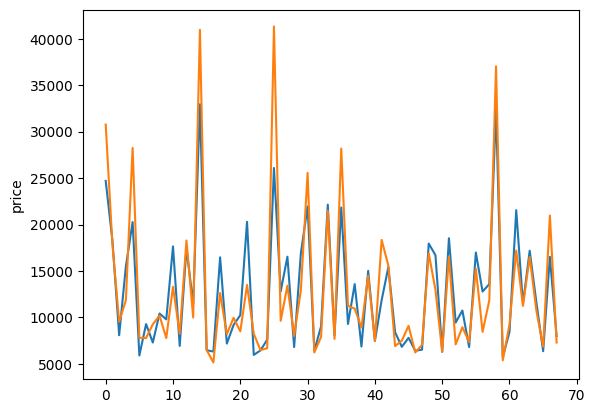

In [65]:
scores_and_plots(X.shape,'knr',knr_best_predict,y_test)

### Inference

> **Random Forest Regressor performs well than other models for this dataset**

# 7. Predicting scrap Car price

In [66]:
car_feature_dict = {'fueltypes':['gas'],'doornumbers':['four'],'carbody':['sedan'],'drivewheels':['forward_drive'],
                   'wheelbase':[100],'carlength':[160],'carheight':[50],'curbweight':[2500],'enginesize':[120],'fuelsystem':['mpfi'],
                   'compressionratio':[8.9],'horsepower':[150],'peakrpm':[5000],'citympg':[26],'highwaympg':[30]}
car_price_test = pd.DataFrame.from_dict(car_feature_dict)

In [67]:
car_df['highwaympg'].min()

16

In [68]:
proc = processing.transform(car_price_test)
one_d_test = normalize(proc)

In [69]:
# random forest

rf_reg.predict(one_d_test)

array([10913.2775])

# 8. Pickling the Random Forest Model

In [70]:
pickle.dump(rf_reg,open('random_forest_regressor.pkl','wb'))

# 9. Testing a sample from X_test

In [71]:
rf_reg.predict(X_test_input[4].reshape(1,-1))

array([26025.565])

In [72]:
np.array(y_test)[4]

28248.0